# Detecting Face Masks through an Image

## Import Modules

In [1]:
# Use Tensorflow 2+
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Load Models

In [2]:
facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('models/mask_detector.model')

2022-01-04 16:28:34.211007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Images

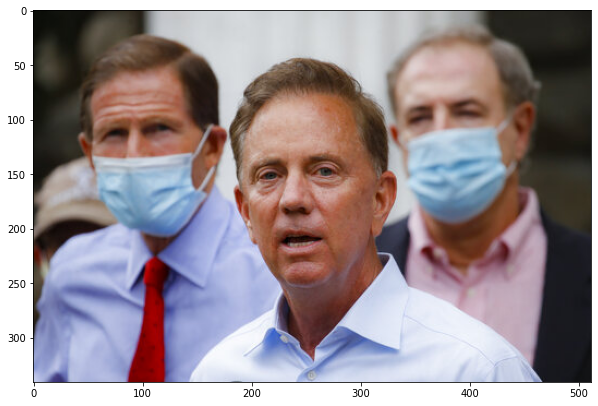

In [3]:
img = cv2.imread('imgs/01.jpg')
h, w = img.shape[:2]

plt.figure(figsize=(10, 10))
plt.imshow(img[:, :, ::-1])

## Preparation for Face Detection on the Images

In [4]:
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))
facenet.setInput(blob)
dets = facenet.forward()

## Detecting Faces on the Images

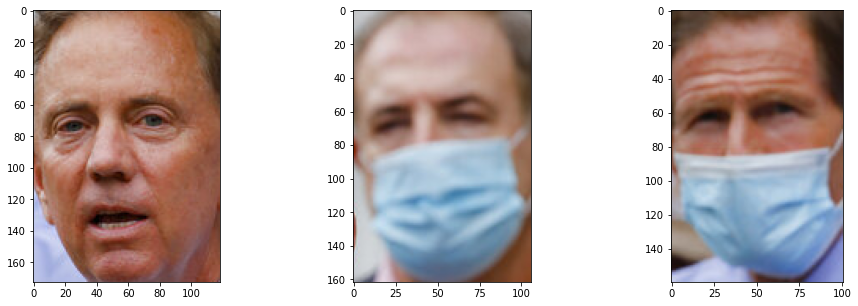

In [5]:
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence > 0.5:
        x1 = int(dets[0, 0, i, 3] * w)
        y1 = int(dets[0, 0, i, 4] * h)
        x2 = int(dets[0, 0, i, 5] * w)
        y2 = int(dets[0, 0, i, 6] * h)
        faces.append(img[y1:y2, x1:x2])
    
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])

## Detecting Masks from Faces

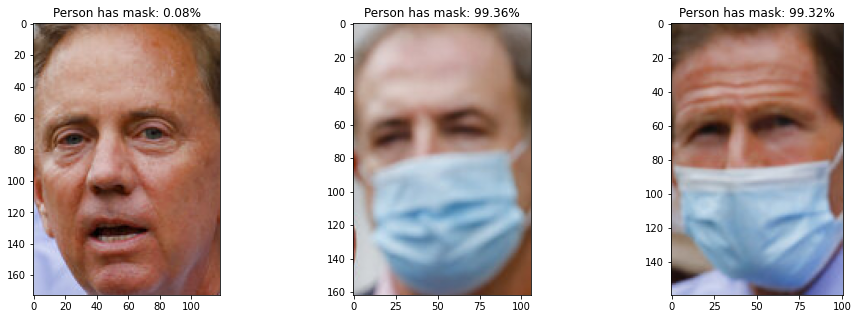

In [13]:
plt.figure(figsize=(16, 5))

for i,face in enumerate(faces):
    face_mask = cv2.resize(face, dsize=(224, 224))
    face_mask = cv2.cvtColor(face_mask, cv2.COLOR_BGR2RGB)
    face_mask = preprocess_input(face_mask)
    face_mask = np.expand_dims(face_mask, axis=0)
    
    mask, nomask = model.predict(face_mask).squeeze()
    
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.title('Person has mask: {}'.format('%.2f%%' % (mask*100)))

plt.show()